# Signal Processing Exam Spring 2021
## EDS2003-1
## Practical Part

In [2]:
import numpy as np
import scipy.io as sp
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.io import wavfile
import librosa
import librosa.display
from scipy import signal

# Task 1

In [3]:
[Fs, C4] = wavfile.read('C4.wav'); #Loading the .wav file we want to use

C4 = C4 - np.mean(C4);
C4 = C4/np.std(C4);
# len(C4)
# print(C4)
fftC4 = scipy.fftpack.fft(C4) #Using the fourier transform on the .wac file to get the frequency domain
fftC4 = scipy.fftpack.fftshift(fftC4)
NN = len(fftC4);
xaxis = np.linspace(-Fs/2*np.exp(-3), Fs/2*np.exp(-3), NN) #Defining the x-axis in the frequency domain
#--------------------------------------------
T = 1/Fs
ns = 100
n = np.arange(0, ns, T) #Defining the x-axis in the time domain
a = 2**(1/12);
f0 = 440; # Hz
fA4 = f0;
fC4 = fA4*a**(-9);
#--------------------------------------------
#Defining the Sinusoidal used to compare
N = len(C4);
t = (np.linspace(0,(N-1),N))/Fs
A = 1;
x = A*np.cos(2*np.pi*fC4*t);
X = scipy.fftpack.fft(x);
X = scipy.fftpack.fftshift(X);

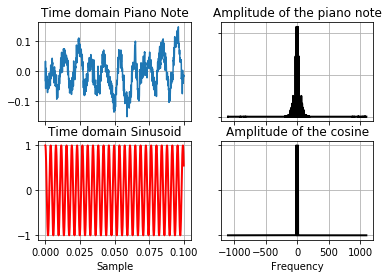

In [4]:
fig, ax = plt.subplots(2,2) #Used to plot multiple graphs next to each other
#-------------------------------------------------------------------------------------------------
ax[0,0].plot(n[:round(Fs/10)],C4[:round(Fs/10)])
ax[0,0].set_title('Time domain Piano Note')
ax[0,0].set_xlabel('Sample')
ax[0,0].grid()
#-------------------------------------------------------------------------------------------------
ax[0,1].plot(xaxis,abs(fftC4)/(max(abs(x))), color='k', lw= 2)
ax[0,1].set_title('Amplitude of the piano note')
ax[0,1].grid()
ax[0,1].set_xlabel('Frequency')
#-------------------------------------------------------------------------------------------------
ax[1,0].plot(n[:round(Fs/10)], x[:round(Fs/10)], color='r', lw = 2)
ax[1,0].set_title('Time domain Sinusoid')
ax[1,0].set_xlabel('Sample')
# ax[1,0].axis([0, 0.1, -2, 2])
# ax[1,0].axis('auto')
# ax[1,0].figsize=(30, 30)
ax[1,0].grid()
#-------------------------------------------------------------------------------------------------
ax[1,1].plot(xaxis, abs(X)/(max(abs(X))), color='k', lw = 2)
ax[1,1].set_title('Amplitude of the cosine')
ax[1,1].set_xlabel('Frequency')
ax[1,1].grid()
#-------------------------------------------------------------------------------------------------
#Removing the x-axis and y-axis inbetween the graphs so it looks nicer
for ax in ax.flat:
    ax.label_outer()
plt.show()

In [5]:
#Defining our variables
SrR = 44100 #Sample rate for the recorded song
SrS = 8*np.exp(3) #Sample rate for the synth
Nsec = 30 #How long we want to be sampling for
NsampR = Nsec*SrR #How many samples we want for the recorded song
NsampS = Nsec*SrS #How many samples we want for the synth

Text(0.5, 1.0, 'Spectogram of 44kHz Song')

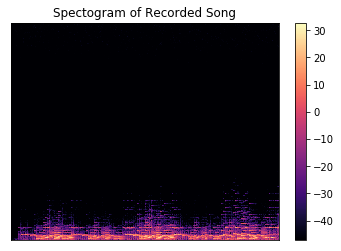

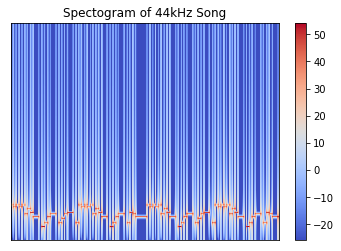

In [6]:
Rec = r"C:\Users\kimtf\Documents\USN - Skolemappe\Signalbehandling\Home Exam\BEETHOVEN_Pour Elise2.wav"
Synth = r"C:\Users\kimtf\Documents\USN - Skolemappe\Signalbehandling\Home Exam\FurElise.wav"
RecordLib, Sr1 = librosa.load(Rec, sr=None, duration=30) #Loading the recorded song and defining how much of it we want to load
SynthLib, Sr2 = librosa.load(Synth, sr=None) #Loading the synth

SpecRec = librosa.stft(RecordLib) #Using the stft function (Shor time fourier transform) on the recorded song
SpecRec_db = librosa.amplitude_to_db(np.abs(SpecRec)) #Changing the stft from Amplitude to dB
plt.figure()
librosa.display.specshow(SpecRec_db) #Used to display the spectogram
plt.colorbar()
plt.title('Spectogram of Recorded Song')
#---------------------------------------------------------------------
SpecSynth = librosa.stft(SynthLib) #Using the stft function (Shor time fourier transform) on the synth
SpecSynth_db = librosa.amplitude_to_db(np.abs(SpecSynth)) #Changing the stft from Amplitude to dB
plt.figure()
librosa.display.specshow(SpecSynth_db) #Used to display the spectogram
plt.colorbar()
plt.title('Spectogram of 44kHz Song')

# Task 2

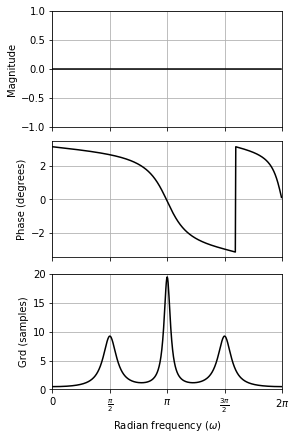

In [11]:
# Defining the poles and Zeros:
p1 = .9*np.exp(1j*np.pi)
p2 = .8*np.exp(1j*(np.pi/2))
p3 = np.conj(p2)

z1 = 1/np.conj(p1)
z2 = 1/np.conj(p2)
z3 = np.conj(z2)

Z = np.array([z1,z2,z3])
P = np.array([p1,p2,p3])

K = p1*p2*p3

# Finding the Magnitude, Phase Response and Group Delay
b, a = signal.zpk2tf(Z,P,K)
w, Ha = signal.freqz(b,a)
angleHa = np.angle(Ha)
w, grdH = signal.group_delay((b,a),whole=True)

# Plotting the Results:
fig1, axs = plt.subplots(3,1, sharex= True,figsize=(4,6),constrained_layout=True)
axs[0].plot(w,20*np.log10(abs(Ha)),'k')
axs[0].set_ylabel('Magnitude')
axs[0].set_ylim([-1, 1])
axs[0].grid(True)

axs[1].plot(w,angleHa,'k')
axs[1].grid()
axs[1].set_ylabel('Phase (degrees)')

axs[2].plot(w,grdH,'k')
axs[2].set_ylabel('Grd (samples)')
axs[2].set_xlabel('Radian frequency '+ r'$(\omega)$')
axs[2].grid()
axs[2].set_ylim([0,20])
axs[2].set_xlim([0, 2*np.pi])
axs[2].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs[2].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);

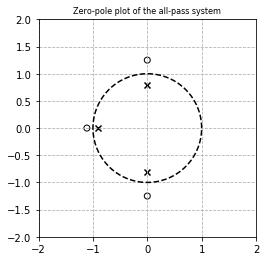

In [8]:
# Creating a unit circle
theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

# Plotting the poles and zeros
fig, ax = plt.subplots(1)
ax.plot(x1, x2,'--k')
ax.scatter(np.real(Z), np.imag(Z), marker='o', edgecolor='k', facecolor='none')
ax.scatter(np.real(P), np.imag(P), marker='x', color='k')
ax.set_aspect(1)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.grid(linestyle='--')

plt.title('Zero-pole plot of the all-pass system', fontsize=8);

# Task 4

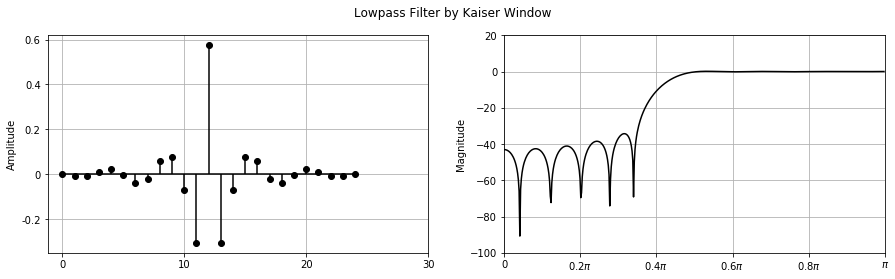

In [12]:
#Specifications:
delta = .02
wp = .5*np.pi
ws = .35*np.pi
wc = (ws + wp)/2;
A = 33.98
M = 24
# beta = 2.65
alpha = M/2
n = np.arange(M+1)

# The allpass filter
np.seterr(divide='ignore', invalid='ignore')

hi_ap = np.sin(np.pi*(n-alpha))/(np.pi*(n-alpha))
hi_ap[np.isnan(hi_ap)] = 1;

# The lowpass filter
hi_lp = np.sin(wc*(n-alpha))/(np.pi*(n-alpha))
hi_lp[np.isnan(hi_lp)] = wc/np.pi;

# The highpass filter:
hp = hi_ap - hi_lp
np.seterr(divide='warn', invalid='warn');

# Defining the Kaiser Window:
if A > 50:
    beta = .1102*(A - 8.7)
elif A < 21:
    beta = 0.
else:
    beta = .5842*(A - 21)**(.4) + .07886*(A - 21)

Win = np.kaiser(M+1, beta)

# Windowing the filter:
h = hp*Win
w, H = signal.freqz(h,1,worN=512)

# Plotting the Results:
fig1, axs = plt.subplots(1,2, sharex= False,figsize=(15,4))
fig1.suptitle('Lowpass Filter by Kaiser Window')
markerline, stemlines, baseline  = axs[0].stem(h, markerfmt='ko',use_line_collection=True)
markerline.set_markerfacecolor('k')
stemlines.set_color('k')
baseline.set_color('k')

axs[0].set_ylabel('Amplitude')
axs[0].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_yticklabels([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_xticks([0, 10, 20, 30])
axs[0].grid(True)

axs[1].plot(w,20*np.log10(abs(H)),'k')
axs[1].set_ylabel('Magnitude')
axs[1].set_ylim([-100, 20])
axs[1].grid(True)
axs[1].set_xlim([0, np.pi])
axs[1].set_xticks([0, 2*np.pi/10, 4*np.pi/10, 6*np.pi/10, 8*np.pi/10, np.pi])
axs[1].set_xticklabels([0, r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$',r'$0.8\pi$', r'$\pi$']);

##### The main difference we see when we use M odd and M even is that if its odd the Magnitude plot goes to 0 at pi and when its even it stays flat and continuous.

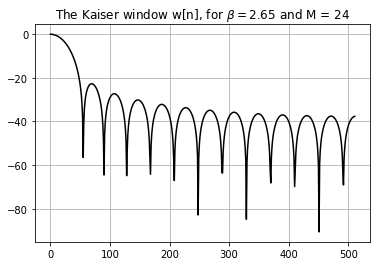

In [10]:
# Fourier Transform of the Kaiser Window
w, H = signal.freqz(Win,1,worN=512)
H = H/np.max(np.abs(H))
plt.plot(20*np.log10(abs(H)),'k')
plt.grid()
plt.title('The Kaiser window w[n], for ' + r'$\beta = $' + str(round(beta,2)) + ' and ' + 'M = ' + str(int(M)));